## Step 1: Environment Setup
we use
- `yfinance`: To fetch historical stock data from Yahoo Finance.
- `pandas`: For data manipulation and analysis.
- `matplotlib` and `seaborn`: For data visualization.
- `plotly`: For interactive visualizations (optional).
- `ta`: To calculate technical analysis indicators like RSI, MACD, SMA, etc.

In [171]:
pip install yfinance ta

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [172]:
# import all libraries
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import ta
import yfinance as yf
import os
import time

## Step 2: Load Stock Data

We'll use the `yfinance` library to download historical stock data.  
For this project, we will analyze Infosys (Ticker: INFY.NS) from 2020 to 2024.

Yahoo Finance provides Open, High, Low, Close, Adjusted Close, and Volume data.


In [173]:
df = yf.download('INFY.NS', start='2021-04-01', end='2025-03-31')
df.to_csv('data/INFY.csv')

[*********************100%***********************]  1 of 1 completed


#### 2A. Basic Structure & Preview
 - View first few rows	 = df.head()
 - View last few rows	 = df.tail()
 - Check number of rows & columns	= df.shape
 - Check column names	 = df.columns
 - Check index range	 = df.index

In [174]:
df.head(5)

Price,Close,High,Low,Open,Volume
Ticker,INFY.NS,INFY.NS,INFY.NS,INFY.NS,INFY.NS
Date,,,,,
2021-04-01,1262.684814,1268.518784,1249.740790,1257.944777,5675155
2021-04-05,1285.200195,1298.964640,1264.325583,1267.971800,9479572
2021-04-06,1286.248535,1299.876225,1282.055297,1297.141563,5793571
2021-04-07,1303.704712,1308.034594,1282.192056,1285.519251,5879234
2021-04-08,1312.501221,1323.303115,1295.318447,1303.522435,5654434


In [175]:
df.tail()

Price,Close,High,Low,Open,Volume
Ticker,INFY.NS,INFY.NS,INFY.NS,INFY.NS,INFY.NS
Date,,,,,
2025-03-24,1592.750000,1607.099976,1572.699951,1597.949951,8857726
2025-03-25,1628.449951,1636.150024,1605.000000,1605.000000,9890140
2025-03-26,1599.449951,1637.750000,1595.000000,1626.000000,6651302
2025-03-27,1603.550049,1619.949951,1586.000000,1595.550049,9426573
2025-03-28,1570.650024,1598.449951,1560.000000,1590.000000,6799047


In [176]:
df.shape

(988, 5)

In [177]:
df.columns

MultiIndex([( 'Close', 'INFY.NS'),
            (  'High', 'INFY.NS'),
            (   'Low', 'INFY.NS'),
            (  'Open', 'INFY.NS'),
            ('Volume', 'INFY.NS')],
           names=['Price', 'Ticker'])

In [178]:
# it shows the date from 1 April 2021 to 31 march 2025
df.index

DatetimeIndex(['2021-04-01', '2021-04-05', '2021-04-06', '2021-04-07',
               '2021-04-08', '2021-04-09', '2021-04-12', '2021-04-13',
               '2021-04-15', '2021-04-16',
               ...
               '2025-03-17', '2025-03-18', '2025-03-19', '2025-03-20',
               '2025-03-21', '2025-03-24', '2025-03-25', '2025-03-26',
               '2025-03-27', '2025-03-28'],
              dtype='datetime64[ns]', name='Date', length=988, freq=None)

#### 2B: Data Types & General Info
- Data types of each column	= df.dtypes
- Full summary of columns	= df.info()

In [179]:
df.dtypes

Price   Ticker 
Close   INFY.NS    float64
High    INFY.NS    float64
Low     INFY.NS    float64
Open    INFY.NS    float64
Volume  INFY.NS      int64
dtype: object

In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 988 entries, 2021-04-01 to 2025-03-28
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Close, INFY.NS)   988 non-null    float64
 1   (High, INFY.NS)    988 non-null    float64
 2   (Low, INFY.NS)     988 non-null    float64
 3   (Open, INFY.NS)    988 non-null    float64
 4   (Volume, INFY.NS)  988 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 46.3 KB


#### 2C :  Statistical Summary
- Numerical summary = df.describe()
- Unique values per column	= df.nunique()

In [181]:
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,INFY.NS,INFY.NS,INFY.NS,INFY.NS,INFY.NS
count,988.000000,988.000000,988.000000,988.000000,9.880000e+02
mean,1523.341661,1537.432777,1509.157161,1523.746410,6.574076e+06
std,198.945724,201.667527,196.317705,198.778218,3.943048e+06
min,1161.822754,1168.090504,1125.640487,1164.244395,0.000000e+00
25%,1383.811432,1396.444535,1373.183840,1382.212672,4.450626e+06
50%,1477.474792,1491.647769,1468.795713,1482.212301,5.677674e+06
75%,1634.134186,1647.475413,1616.325958,1634.938776,7.436848e+06
max,1999.699951,2006.449951,1977.599976,1995.449951,5.317170e+07


In [182]:
df.nunique()

Price   Ticker 
Close   INFY.NS    977
High    INFY.NS    986
Low     INFY.NS    986
Open    INFY.NS    987
Volume  INFY.NS    987
dtype: int64

#### 2D : Missing & Duplicate Data
- Missing values =	df.isnull().sum()
- Duplicate rows =	df.duplicated().sum()

In [183]:
df.isnull().sum()

Price   Ticker 
Close   INFY.NS    0
High    INFY.NS    0
Low     INFY.NS    0
Open    INFY.NS    0
Volume  INFY.NS    0
dtype: int64

In [184]:
df.duplicated().sum()

0

#### 2E : Value Counts & Distributions 
- Frequency of categories =	df['column'].value_counts()
- Value distribution (for numeric) = df['column'].hist() (with matplotlib)

In [185]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,INFY.NS,INFY.NS,INFY.NS,INFY.NS,INFY.NS
Date,,,,,
2021-04-01,1262.684814,1268.518784,1249.740790,1257.944777,5675155
2021-04-05,1285.200195,1298.964640,1264.325583,1267.971800,9479572
2021-04-06,1286.248535,1299.876225,1282.055297,1297.141563,5793571
2021-04-07,1303.704712,1308.034594,1282.192056,1285.519251,5879234
2021-04-08,1312.501221,1323.303115,1295.318447,1303.522435,5654434


In [186]:
df['Volume'].value_counts()

INFY.NS 
5919715     2
0           1
6857402     1
6795691     1
6799047     1
           ..
4823228     1
4824077     1
4824609     1
4834389     1
53171705    1
Name: count, Length: 987, dtype: int64

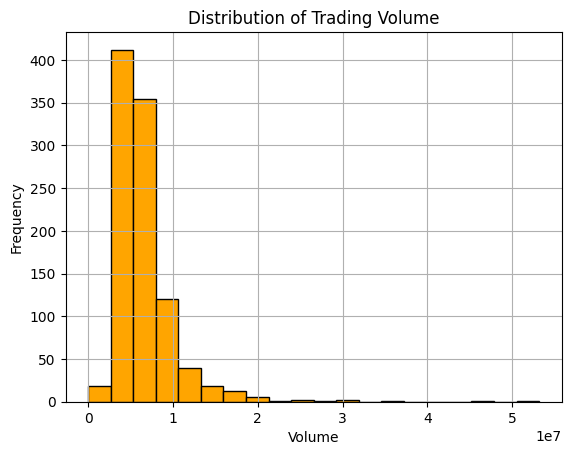

In [187]:
df['Volume'].hist(bins=20, color='orange', edgecolor='black')
plt.title('Distribution of Trading Volume')
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.show()


#### 2F : Correlation & Advanced Inspection
- Correlation matrix =	df.corr()
- Visualize correlation =	sns.heatmap(df.corr()) (Seaborn)

In [188]:
df.corr()

,Price,Close,High,Low,Open,Volume
,Ticker,INFY.NS,INFY.NS,INFY.NS,INFY.NS,INFY.NS
Price,Ticker,,,,,
Close,INFY.NS,1.000000,0.998486,0.998421,0.995886,-0.106657
High,INFY.NS,0.998486,1.000000,0.998194,0.998138,-0.091445
Low,INFY.NS,0.998421,0.998194,1.000000,0.997956,-0.123323
Open,INFY.NS,0.995886,0.998138,0.997956,1.000000,-0.107627
Volume,INFY.NS,-0.106657,-0.091445,-0.123323,-0.107627,1.000000


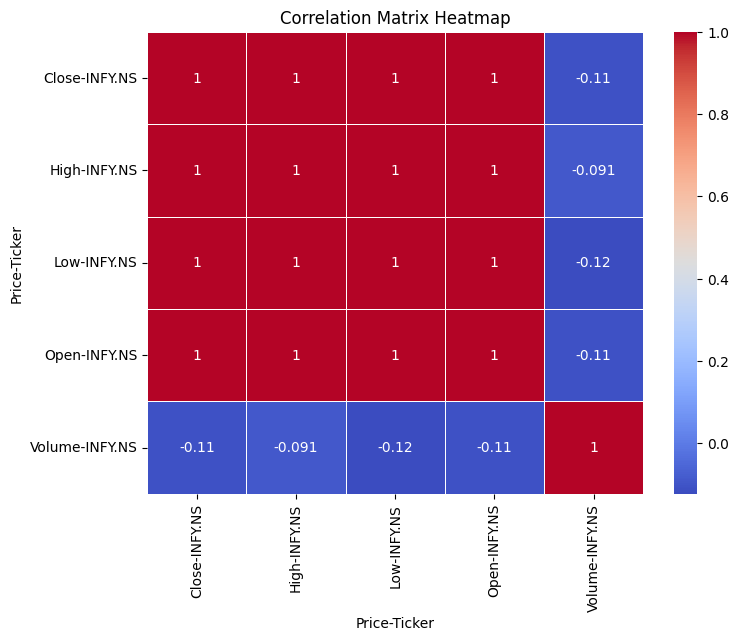

In [189]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True, cmap='coolwarm', linewidth=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

### Some lows & Highs:
 in this we check in entire time period to see some lows and high price of stock  (from 1 april 2021 to 31 march 2025)

#### Lowest High: 
- from below data we say in 24 april 23 high of stock is lowest - 1168.09

In [190]:
lowest_high = df.sort_values(by=[('High', 'INFY.NS')])
lowest_high.to_csv('data/lowest_high.csv')
lowest_high.head()

Price,Close,High,Low,Open,Volume
Ticker,INFY.NS,INFY.NS,INFY.NS,INFY.NS,INFY.NS
Date,,,,,
2023-04-24,1164.576782,1168.090504,1156.694499,1166.191170,8313774
2023-04-26,1165.763916,1170.939555,1159.116246,1166.191220,5680192
2023-04-21,1165.573975,1171.177034,1158.593944,1166.286225,8691352
2023-04-25,1163.247314,1173.313763,1153.845586,1164.244395,6808576
2023-04-20,1161.822754,1175.545397,1159.923420,1168.755254,8621249


#### Highest High: 
- from below data we say in 13-12-2024 high of stock is High - 2006.44

In [191]:
Highest_high = df.sort_values(by=[('High', 'INFY.NS')], ascending=False)
Highest_high.to_csv('data/highest_high.csv')
Highest_high.head()

Price,Close,High,Low,Open,Volume
Ticker,INFY.NS,INFY.NS,INFY.NS,INFY.NS,INFY.NS
Date,,,,,
2024-12-13,1999.699951,2006.449951,1953.800049,1969.750000,5362693
2024-12-16,1980.050049,1999.599976,1977.599976,1995.449951,3119221
2024-12-12,1987.000000,1998.800049,1970.550049,1975.199951,6462130
2024-12-18,1979.150024,1984.949951,1961.599976,1966.800049,3064095
2025-01-13,1962.199951,1982.800049,1949.000000,1956.000000,5804152


#### Lowest Opening :
- from below data we say in 25-04-23 Opening of stock is lowest - 1164.24

In [192]:
lowest_opening = df.sort_values(by=[('Open', 'INFY.NS')])
lowest_opening.to_csv('data/lowest_opening.csv')
lowest_opening.head()

Price,Close,High,Low,Open,Volume
Ticker,INFY.NS,INFY.NS,INFY.NS,INFY.NS,INFY.NS
Date,,,,,
2023-04-25,1163.247314,1173.313763,1153.845586,1164.244395,6808576
2023-04-24,1164.576782,1168.090504,1156.694499,1166.191170,8313774
2023-04-26,1165.763916,1170.939555,1159.116246,1166.191220,5680192
2023-04-21,1165.573975,1171.177034,1158.593944,1166.286225,8691352
2023-04-27,1183.522583,1184.994613,1163.722048,1168.090493,8020704


#### Highest Closing :
- from below data we say in 13-12-2024 Opening of stock is highest - 1969.75

In [193]:
highest_opening = df.sort_values(by=[('Close', 'INFY.NS')], ascending=False)
highest_opening.to_csv('data/highest_closing.csv')
highest_opening.head()

Price,Close,High,Low,Open,Volume
Ticker,INFY.NS,INFY.NS,INFY.NS,INFY.NS,INFY.NS
Date,,,,,
2024-12-13,1999.699951,2006.449951,1953.800049,1969.750000,5362693
2024-12-12,1987.000000,1998.800049,1970.550049,1975.199951,6462130
2024-12-16,1980.050049,1999.599976,1977.599976,1995.449951,3119221
2024-12-18,1979.150024,1984.949951,1961.599976,1966.800049,3064095
2024-12-17,1976.599976,1982.000000,1958.000000,1968.000000,5811050


## Step 3: Visualize the Closing Price Trend

Plotting the closing price over time helps us visually understand stock performance.

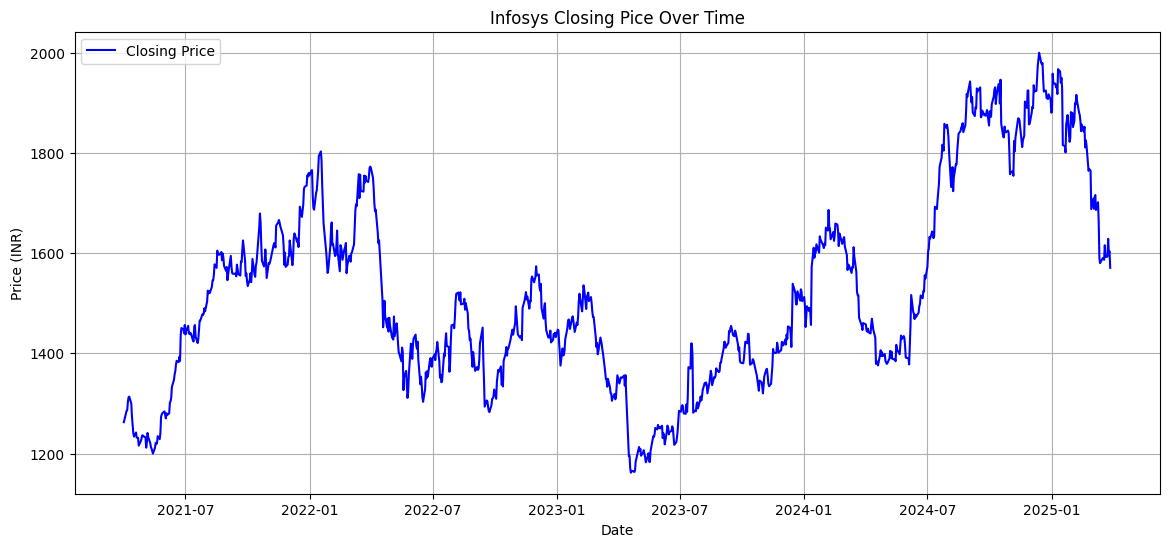

In [194]:
plt.figure(figsize=(14,6))
plt.plot(df['Close'], label='Closing Price', color='blue')
plt.title('Infosys Closing Pice Over Time')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.legend()
plt.grid(True)

plt.savefig('plots/closing_price.png')
plt.show()

## Step 4: Add Technical Indicators

### Step 4A: Simple Moving Averages (SMA)

- SMA smooths out price data to highlight trends.  
- We'll calculate 50-day and 200-day SMAs.
- Traders use it to identify trend direction.
- If the 50-day SMA crosses above the 200-day SMA, it’s called a golden cross (bullish signal).
- If it crosses below, it's a death cross (bearish signal).



In [195]:
df['SMA_50'] = df['Close'].rolling(window=50).mean()
df['SMA_200'] = df['Close'].rolling(window=200).mean()
df.head()

Price,Close,High,Low,Open,Volume,SMA_50,SMA_200
Ticker,INFY.NS,INFY.NS,INFY.NS,INFY.NS,INFY.NS,,
Date,,,,,,,
2021-04-01,1262.684814,1268.518784,1249.740790,1257.944777,5675155,NaN,NaN
2021-04-05,1285.200195,1298.964640,1264.325583,1267.971800,9479572,NaN,NaN
2021-04-06,1286.248535,1299.876225,1282.055297,1297.141563,5793571,NaN,NaN
2021-04-07,1303.704712,1308.034594,1282.192056,1285.519251,5879234,NaN,NaN
2021-04-08,1312.501221,1323.303115,1295.318447,1303.522435,5654434,NaN,NaN


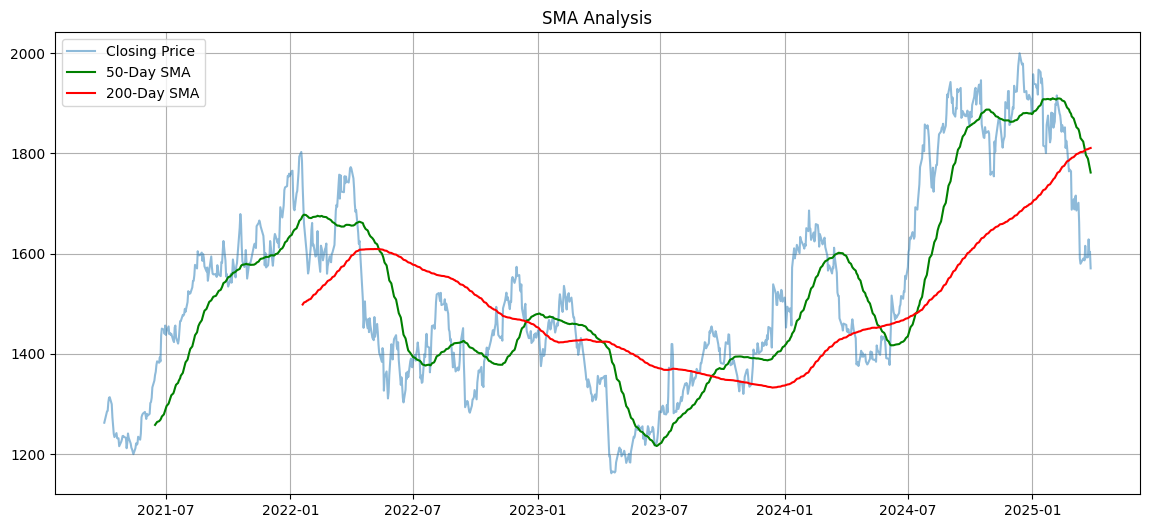

In [196]:
plt.figure(figsize=(14,6))
plt.plot(df['Close'], label='Closing Price', alpha=0.5)
plt.plot(df['SMA_50'], label='50-Day SMA', color='green')
plt.plot(df['SMA_200'], label='200-Day SMA', color='red')
plt.legend()
plt.title('SMA Analysis')
plt.grid(True)

plt.savefig('plots/technical_indicator.png')
plt.show()

### Step 4B: Relative Strength Index (RSI)

RSI is a momentum indicator that shows whether a stock is **overbought or oversold**.

- RSI above 70 = Overbought (price might fall)
- RSI below 30 = Oversold (price might rise)

We use a 14-day window to calculate RSI.

In [197]:
from ta.momentum import RSIIndicator

rsi = RSIIndicator(close=df['Close'].squeeze(), window=14)
df['rsi'] = rsi.rsi()
df.head()

Price,Close,High,Low,Open,Volume,SMA_50,SMA_200,rsi
Ticker,INFY.NS,INFY.NS,INFY.NS,INFY.NS,INFY.NS,,,
Date,,,,,,,,
2021-04-01,1262.684814,1268.518784,1249.740790,1257.944777,5675155,NaN,NaN,NaN
2021-04-05,1285.200195,1298.964640,1264.325583,1267.971800,9479572,NaN,NaN,NaN
2021-04-06,1286.248535,1299.876225,1282.055297,1297.141563,5793571,NaN,NaN,NaN
2021-04-07,1303.704712,1308.034594,1282.192056,1285.519251,5879234,NaN,NaN,NaN
2021-04-08,1312.501221,1323.303115,1295.318447,1303.522435,5654434,NaN,NaN,NaN


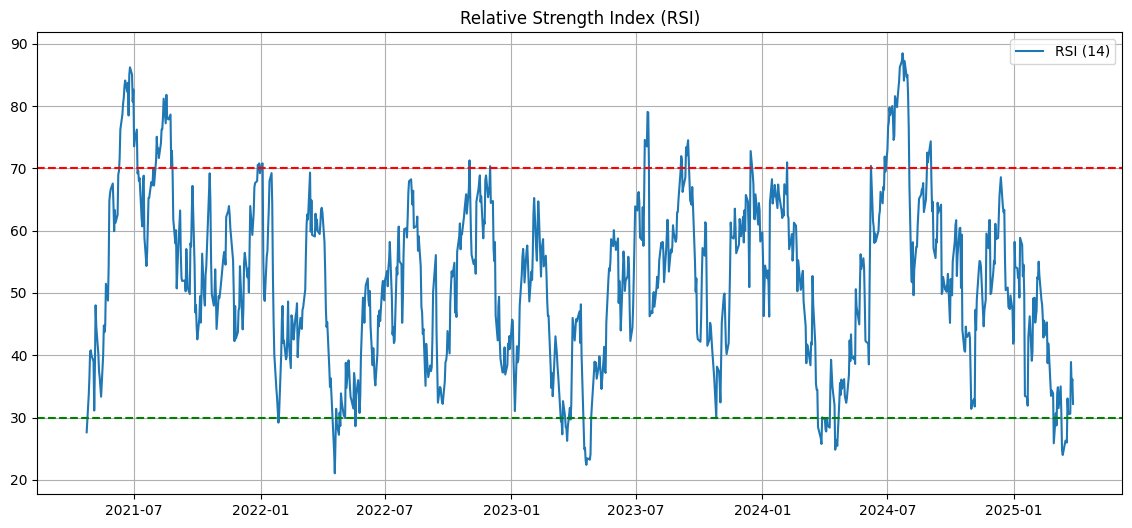

In [198]:
plt.figure(figsize=(14,6))
plt.plot(df['rsi'], label='RSI (14)')
plt.axhline(70, color='r', linestyle='--')
plt.axhline(30, color='g', linestyle='--')
plt.title('Relative Strength Index (RSI)')
plt.legend()
plt.grid(True)

plt.savefig('plots/rsi.png')
plt.show()

### Step 4C: Moving Average Convergence Divergence (MACD)

MACD is a trend-following momentum indicator based on the difference between two EMAs (Exponential Moving Averages).

It helps us spot **buy** or **sell** signals:
- MACD line crossing **above** Signal line → Buy
- MACD line crossing **below** Signal line → Sell

#### MACD stand for :
- MACD = EMA(12) - EMA(26)
- EMA = Exponential Moving Average (gives more weight to recent prices)
- MACD Signal Line = EMA(MACD, 9)
- EMA(N) - stands for EMA of the Closing Price over last N days. (n -> 12, 26)

In [199]:
from ta.trend import MACD

macd = MACD(close=df['Close'].squeeze())
df['macd'] = macd.macd()
df['signal'] = macd.macd_signal()
df.head()

Price,Close,High,Low,Open,Volume,SMA_50,SMA_200,rsi,macd,signal
Ticker,INFY.NS,INFY.NS,INFY.NS,INFY.NS,INFY.NS,,,,,
Date,,,,,,,,,,
2021-04-01,1262.684814,1268.518784,1249.740790,1257.944777,5675155,NaN,NaN,NaN,NaN,NaN
2021-04-05,1285.200195,1298.964640,1264.325583,1267.971800,9479572,NaN,NaN,NaN,NaN,NaN
2021-04-06,1286.248535,1299.876225,1282.055297,1297.141563,5793571,NaN,NaN,NaN,NaN,NaN
2021-04-07,1303.704712,1308.034594,1282.192056,1285.519251,5879234,NaN,NaN,NaN,NaN,NaN
2021-04-08,1312.501221,1323.303115,1295.318447,1303.522435,5654434,NaN,NaN,NaN,NaN,NaN


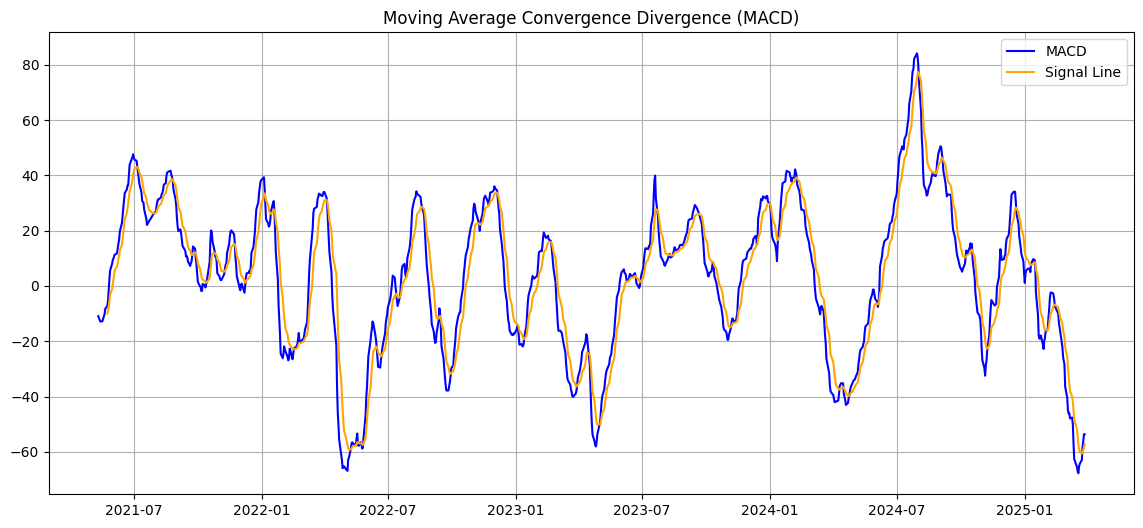

In [200]:
plt.figure(figsize=(14,6))
plt.plot(df['macd'], label='MACD', color='blue')
plt.plot(df['signal'], label='Signal Line', color='orange')
plt.legend()
plt.title('Moving Average Convergence Divergence (MACD)')
plt.grid(True)

plt.savefig('plots/macd.png')
plt.show()

## Step 5: Calculating Daily Returns

We calculate daily returns to understand how much the stock price changes from one day to the next, expressed as a percentage. This helps us measure short-term performance.

We use the `pct_change()` function on the 'Close' price, which gives us the percentage change between the current day and the previous day. We also fill the first row with 0, as it will be NaN.

**Formula**:
We calculate **Daily Return** by subtracting yesterday's closing price from today's closing price, then dividing the result by yesterday's closing price.

In [201]:
df['Daily Return'] = df['Close'].pct_change()
df['Daily Return'].fillna(0, inplace=True)
df.head()

C:\Users\ll526\AppData\Local\Temp\ipykernel_19376\1361713077.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Daily Return'].fillna(0, inplace=True)


Price,Close,High,Low,Open,Volume,SMA_50,SMA_200,rsi,macd,signal,Daily Return
Ticker,INFY.NS,INFY.NS,INFY.NS,INFY.NS,INFY.NS,,,,,,
Date,,,,,,,,,,,
2021-04-01,1262.684814,1268.518784,1249.740790,1257.944777,5675155,NaN,NaN,NaN,NaN,NaN,NaN
2021-04-05,1285.200195,1298.964640,1264.325583,1267.971800,9479572,NaN,NaN,NaN,NaN,NaN,0.017831
2021-04-06,1286.248535,1299.876225,1282.055297,1297.141563,5793571,NaN,NaN,NaN,NaN,NaN,0.000816
2021-04-07,1303.704712,1308.034594,1282.192056,1285.519251,5879234,NaN,NaN,NaN,NaN,NaN,0.013571
2021-04-08,1312.501221,1323.303115,1295.318447,1303.522435,5654434,NaN,NaN,NaN,NaN,NaN,0.006747


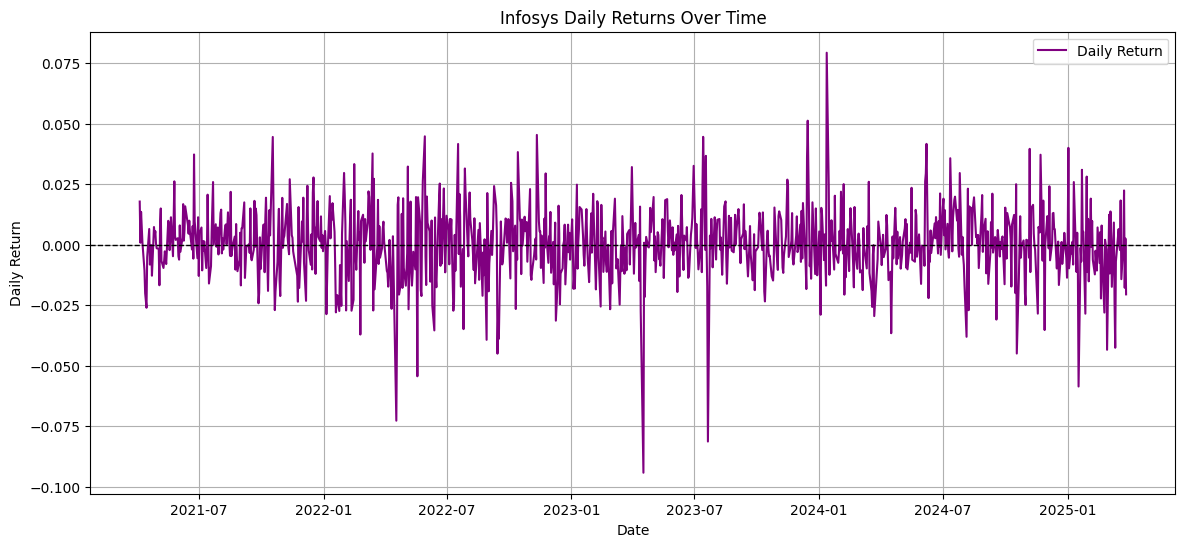

In [202]:
plt.figure(figsize=(14,6))
plt.plot(df.index, df['Daily Return'], label= 'Daily Return', color='purple')
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.title('Infosys Daily Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()
plt.grid(True)

plt.savefig('plots/daily_return.png')
plt.show()

## Step 6: Calculating Cumulative Returns

Cumulative return tells us the total return we would get if we had invested at the beginning and held the stock until now.

We calculate it by multiplying each day’s return cumulatively:

- Cumulative Return = (1 + Return on Day 1) × (1 + Return on Day 2) × ... × (1 + Return on Day t)

For example, if the return is +1% on Day 1 and +2% on Day 2:

- (1 + 0.01) × (1 + 0.02) = 1.01 × 1.02 = 1.0302
So the Cumulative Return = 3.02%

We use `cumprod()` to multiply returns in sequence.

In [203]:
df['Cumulative Return'] =   (1 + df['Daily Return']).cumprod()
df['Cumulative Return'].fillna(0, inplace=True)
df.head()

C:\Users\ll526\AppData\Local\Temp\ipykernel_19376\1980809783.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cumulative Return'].fillna(0, inplace=True)


Price,Close,High,Low,Open,Volume,SMA_50,SMA_200,rsi,macd,signal,Daily Return,Cumulative Return
Ticker,INFY.NS,INFY.NS,INFY.NS,INFY.NS,INFY.NS,,,,,,,
Date,,,,,,,,,,,,
2021-04-01,1262.684814,1268.518784,1249.740790,1257.944777,5675155,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-04-05,1285.200195,1298.964640,1264.325583,1267.971800,9479572,NaN,NaN,NaN,NaN,NaN,0.017831,1.017831
2021-04-06,1286.248535,1299.876225,1282.055297,1297.141563,5793571,NaN,NaN,NaN,NaN,NaN,0.000816,1.018662
2021-04-07,1303.704712,1308.034594,1282.192056,1285.519251,5879234,NaN,NaN,NaN,NaN,NaN,0.013571,1.032486
2021-04-08,1312.501221,1323.303115,1295.318447,1303.522435,5654434,NaN,NaN,NaN,NaN,NaN,0.006747,1.039453


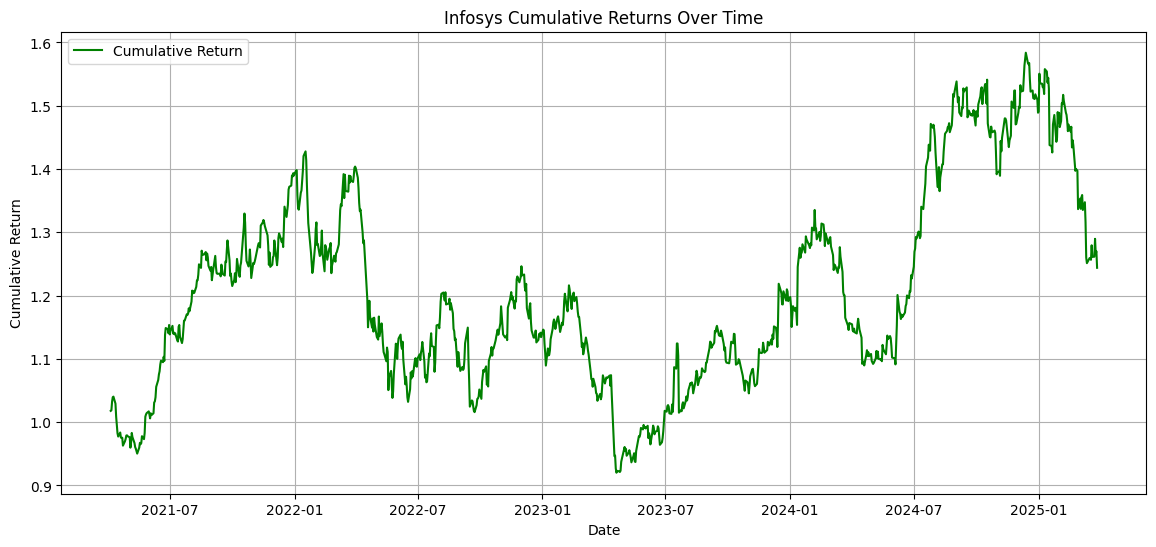

In [204]:
plt.figure(figsize=(14,6))
plt.plot(df.index, df['Cumulative Return'], label='Cumulative Return', color='green')
plt.title('Infosys Cumulative Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)

plt.savefig('plots/cumulative_return.png')
plt.show()

## Step 7: Volatility Analysis

**Volatility** shows how much the stock price fluctuates over a period of time.  
We calculate this using the **rolling standard deviation** of daily returns.  

- A **higher volatility** means the stock is more risky or unstable.
- A **lower volatility** means the stock is stable.

By plotting volatility, we can visually spot high-risk or low-risk time periods.

We typically use a 20-day window to smooth out daily noise and detect meaningful trends.

In [205]:
df[('Volatility', '')] = df[('Daily Return', '')].rolling(window=20).std()
df.head()

Price,Close,High,Low,Open,Volume,SMA_50,SMA_200,rsi,macd,signal,Daily Return,Cumulative Return,Volatility
Ticker,INFY.NS,INFY.NS,INFY.NS,INFY.NS,INFY.NS,,,,,,,,
Date,,,,,,,,,,,,,
2021-04-01,1262.684814,1268.518784,1249.740790,1257.944777,5675155,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-04-05,1285.200195,1298.964640,1264.325583,1267.971800,9479572,NaN,NaN,NaN,NaN,NaN,0.017831,1.017831,NaN
2021-04-06,1286.248535,1299.876225,1282.055297,1297.141563,5793571,NaN,NaN,NaN,NaN,NaN,0.000816,1.018662,NaN
2021-04-07,1303.704712,1308.034594,1282.192056,1285.519251,5879234,NaN,NaN,NaN,NaN,NaN,0.013571,1.032486,NaN
2021-04-08,1312.501221,1323.303115,1295.318447,1303.522435,5654434,NaN,NaN,NaN,NaN,NaN,0.006747,1.039453,NaN


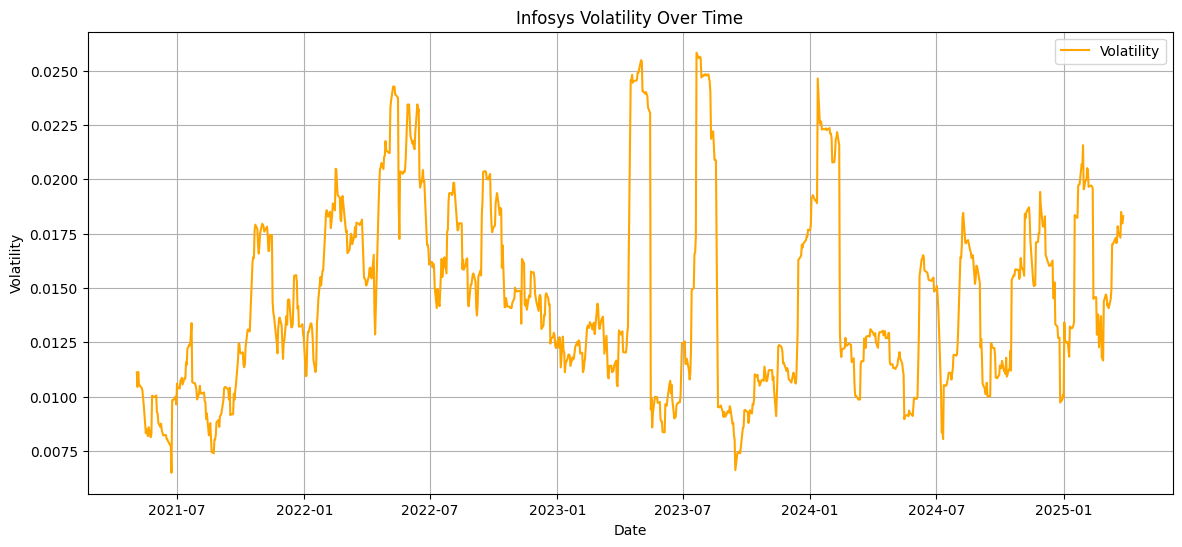

In [206]:
plt.figure(figsize=(14,6))
plt.plot(df.index, df[('Volatility', '')], label='Volatility', color='orange')
plt.title('Infosys Volatility Over Time')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.grid(True)

plt.savefig('plots/volatile_analysis.png')
plt.show()

## Step 8: Bollinger Bands

**Bollinger Bands** are a technical analysis tool used to measure **price volatility**.  
They consist of:

- **Middle Band**: The 50-day Simple Moving Average (SMA)
- **Upper Band**: SMA + 2 × standard deviation
- **Lower Band**: SMA − 2 × standard deviation

These bands expand and contract with price volatility:
- When the price touches the **upper band**, it may be **overbought**
- When it touches the **lower band**, it may be **oversold**

Bollinger Bands help in identifying reversal points and breakout conditions.
We also fill the area between the bands to visualize volatility zones.

In [207]:
rolling_std = df['Close', 'INFY.NS'].rolling(window=50).std()
df[('Upper Band', '')] = df[('SMA_50', '')] + (2 * rolling_std)
df[('Lower Band', '')] = df[('SMA_50', '')] - (2 * rolling_std)
df.head()

Price,Close,High,Low,Open,Volume,SMA_50,SMA_200,rsi,macd,signal,Daily Return,Cumulative Return,Volatility,Upper Band,Lower Band
Ticker,INFY.NS,INFY.NS,INFY.NS,INFY.NS,INFY.NS,,,,,,,,,,
Date,,,,,,,,,,,,,,,
2021-04-01,1262.684814,1268.518784,1249.740790,1257.944777,5675155,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-04-05,1285.200195,1298.964640,1264.325583,1267.971800,9479572,NaN,NaN,NaN,NaN,NaN,0.017831,1.017831,NaN,NaN,NaN
2021-04-06,1286.248535,1299.876225,1282.055297,1297.141563,5793571,NaN,NaN,NaN,NaN,NaN,0.000816,1.018662,NaN,NaN,NaN
2021-04-07,1303.704712,1308.034594,1282.192056,1285.519251,5879234,NaN,NaN,NaN,NaN,NaN,0.013571,1.032486,NaN,NaN,NaN
2021-04-08,1312.501221,1323.303115,1295.318447,1303.522435,5654434,NaN,NaN,NaN,NaN,NaN,0.006747,1.039453,NaN,NaN,NaN


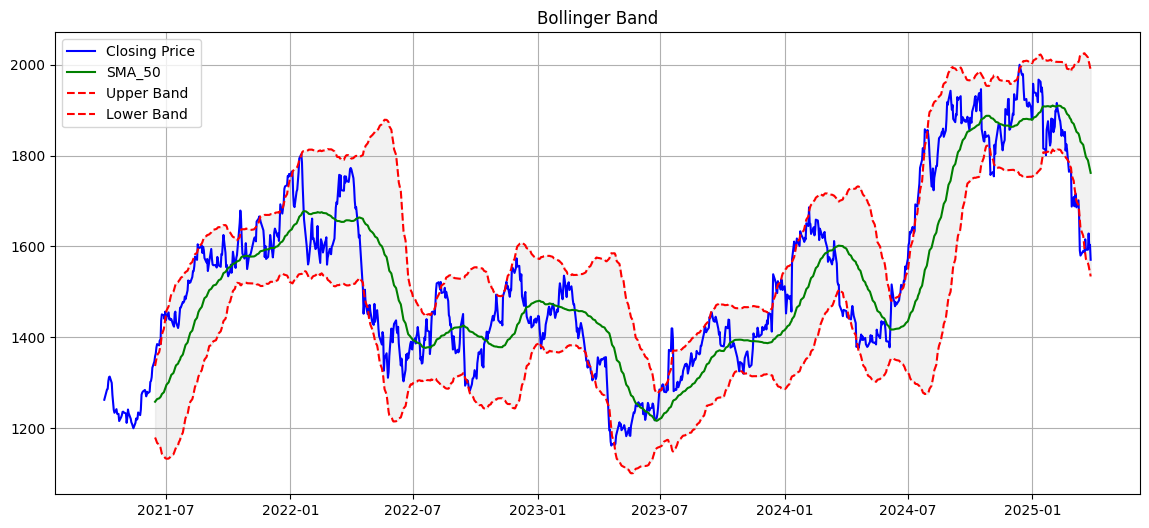

In [208]:
plt.figure(figsize=(14, 6))
plt.plot(df.index, df[('Close', 'INFY.NS')], label='Closing Price', color='blue')
plt.plot(df.index, df[('SMA_50', '')], label='SMA_50', color='green')
plt.plot(df.index, df[('Upper Band', '')], label='Upper Band', linestyle='--', color='red')
plt.plot(df.index, df[('Lower Band', '')], label='Lower Band', linestyle='--', color='red')
plt.fill_between(df.index, df[('Lower Band', '')], df[('Upper Band', '')], color='grey', alpha=0.1)
plt.title('Bollinger Band')
plt.legend()
plt.grid(True)

plt.savefig('plots/bollinger_band.png')
plt.show()

## step 9: Volume & Price Movement (Dual Axis Plot)
To analyze the strength of a stock’s movement, it is important to observe both:

- Price movement (how much the stock price is changing)

- Volume (how many shares are being traded)

These two metrics together help identify strong breakouts or reversals. For example:

- A big price jump with high volume can indicate a strong bullish move.
- A price drop with high volume may confirm strong selling pressure.

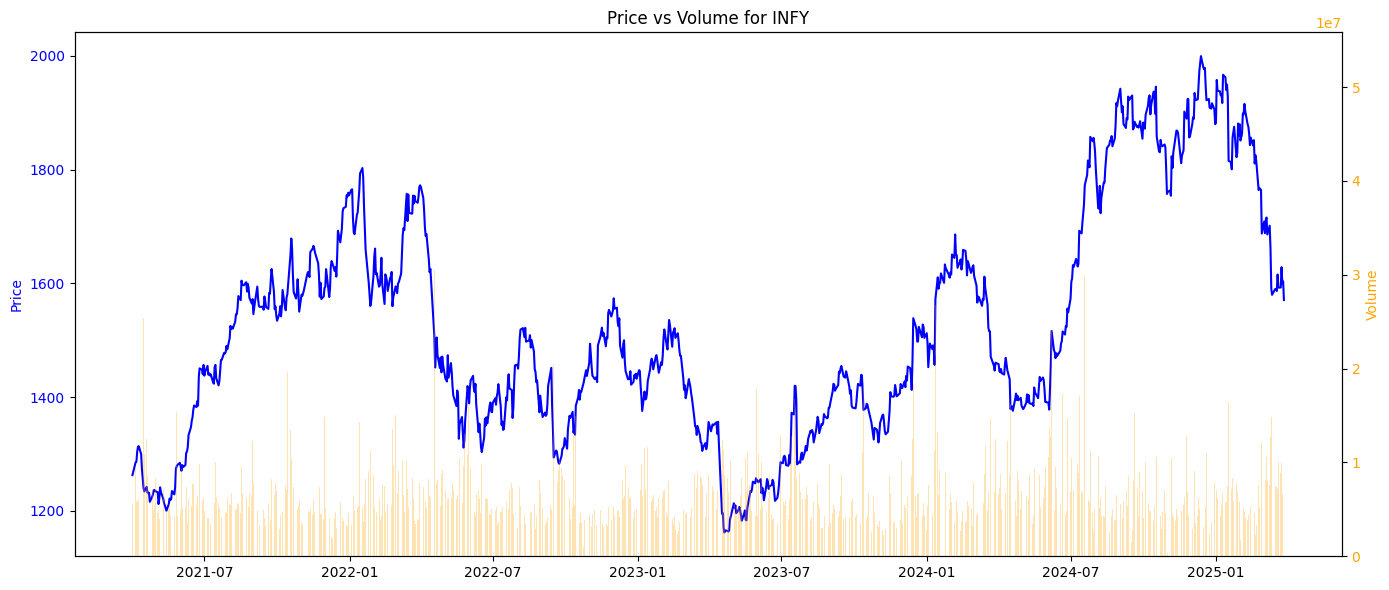

In [209]:
fig, ax1 = plt.subplots(figsize=(14,6))

# Plotting closing price on the primary y-axis
ax1.plot(df.index, df[('Close', 'INFY.NS')], label='Closing Price', color='blue')
ax1.set_ylabel('Price', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Creating the secondary y-axis for volume
ax2 = ax1.twinx()
ax2.bar(df.index, df[('Volume', 'INFY.NS')], color='orange', alpha=0.3, label='Volume')
ax2.set_ylabel('Volume', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

plt.title('Price vs Volume for INFY')
fig.tight_layout()

plt.savefig('plots/dual_axis_plot.png')
plt.show()

## Step 10: Support & Resistance Zone Detection
Support and Resistance are key price levels where the stock tends to bounce or reverse:

- Support: Price level where a downtrend pauses due to demand.

- Resistance: Price level where an uptrend pauses due to selling pressure.

These levels help traders identify:

- Entry/exit points

- Potential breakout or breakdown levels

- Zones of heavy activity or reversals

We’ll use scipy.signal.find_peaks() and rolling min/max to find key zones

In [210]:
from scipy.signal import find_peaks

peaks, _ = find_peaks(df[('Close', 'INFY.NS')], distance= 10)

valleys, _ = find_peaks(-df[('Close', 'INFY.NS')], distance= 10)

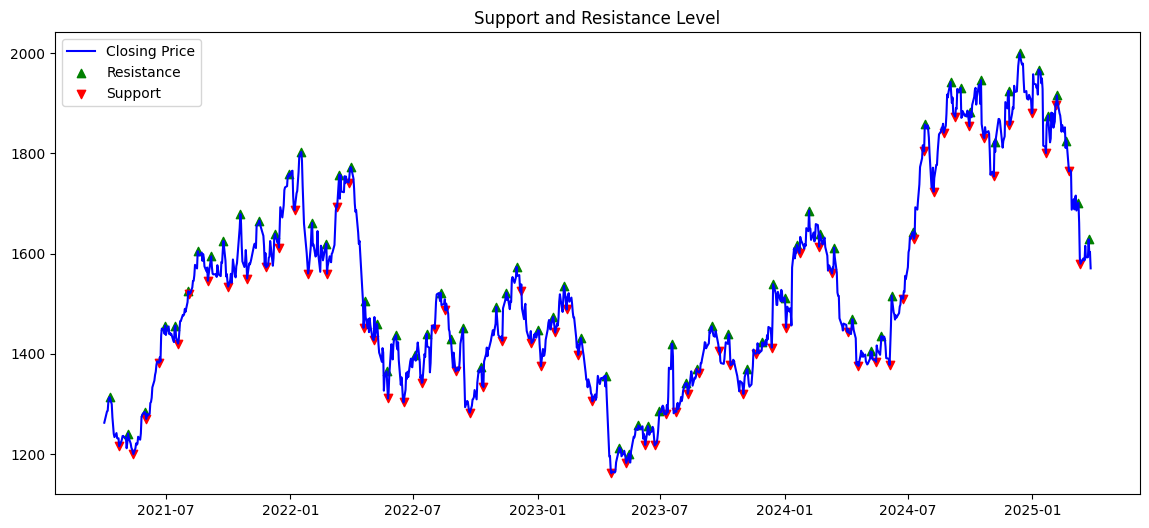

In [211]:
plt.figure(figsize=(14,6))
plt.plot(df.index, df[('Close', 'INFY.NS')], label='Closing Price', color='blue')
plt.scatter(df.index[peaks], df[('Close', 'INFY.NS')].iloc()[peaks], marker='^', color='green', label='Resistance')
plt.scatter(df.index[valleys], df[('Close', 'INFY.NS')].iloc[valleys], marker='v', color='red', label='Support')
plt.title('Support and Resistance Level')
plt.legend()

plt.savefig('plots/support_resistance.png')
plt.show()

## step 11: Signal-Based Strategy Using RSI + MACD Crossover

We build a simple yet effective trading strategy:

- **Buy Entry**:
  - RSI < 30 (oversold zone)
  - MACD crosses **above** the Signal line → bullish momentum

- **Sell Exit**:
  - RSI > 70 (overbought zone)
  - MACD crosses **below** the Signal line → bearish signal

We simulate these signals and calculate returns if someone had followed this strategy.

This gives us a real-world feel of how technical indicators can trigger automated decisions.

In [212]:
# 1: Create signal conditions
buy_condition = (
    (df[('rsi', '')] < 30) & (df[('macd', '')] > df[('signal', '')]) & (df[('macd', '')].shift(1) <= df[('signal', '')].shift(1))
    
)

sell_condition = (
    (df[('rsi', '')] > 70) & (df[('macd', '')] < df[('signal', '')]) & (df[('macd', '')].shift(1) >= df[('macd', '')].shift(1))
)

#2: Create signals
df[('signal', '')] = 0 # 1 for buy and -1 for sell
df.loc[buy_condition, ('signal', '')] = 1
df.loc[sell_condition, ('signal', '')] = -1

#3: forword fill signals to simulate position
df[('Position', '')] = df[('signal', '')].replace(to_replace=0, method='ffill')

#4: Calculate Strategy Return
df[('Strategy Return')] = df[('Daily Return', '')]*df[('Position', '')]

#5: Calculate Cumulative Return for both Strategies
df[('Cumulative Strategy Return', '')] = (1 + df[('Strategy Return', '')]).cumprod()
df[('Cumulative Market Return', '')] = (1 + df[('Daily Return', '')]).cumprod()


C:\Users\ll526\AppData\Local\Temp\ipykernel_19376\752899488.py:17: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[('Position', '')] = df[('signal', '')].replace(to_replace=0, method='ffill')


### Strategy Performance vs Market Return

This plot compares:

- 📗 **Strategy Return** → How your algorithm would perform using buy/sell logic  
- 🔵 **Market Return** → Simply holding the stock without doing anything  

If the **green line** is above the blue one, it means your strategy outperformed the market.

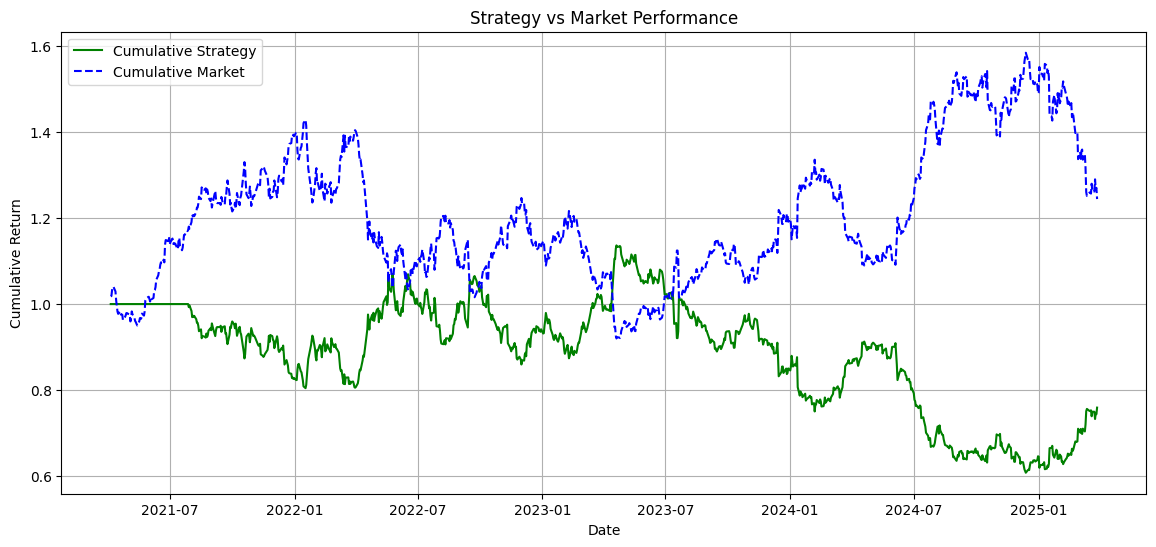

In [213]:
plt.figure(figsize=(14,6))
plt.plot(df.index, df[('Cumulative Strategy Return', '')], label='Cumulative Strategy', color='green')
plt.plot(df.index, df[('Cumulative Market Return', '')], label='Cumulative Market', color='blue', linestyle='--')
plt.title('Strategy vs Market Performance')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)

plt.savefig('plots/signal_base.png')
plt.show()

## step 12: Strategy Performance Evaluation

We analyze the strategy using four key metrics:

- **Sharpe Ratio**: Measures return relative to risk.
- **Max Drawdown**: Measures the largest drop from peak to bottom.
- **Total Return**: Final return of the strategy and stock.
- **Win Rate**: % of days where the strategy made a profit.

These help us compare whether our strategy actually outperforms the stock **in both returns and risk**.

In [214]:

# Strategy & Stock returns
strategy_return = df[('Strategy Return', '')].dropna()
stock_return = df[('Daily Return', '')].dropna()

# 1. Sharpe Ratio (assuming 252 trading days)
sharpe_strategy = np.sqrt(252) * strategy_return.mean() / strategy_return.std()
sharpe_stock = np.sqrt(252) * stock_return.mean() / stock_return.std()

# 2. Maximum Drawdown
cumulative_strategy = ( 1 + strategy_return).cumprod()
rolling_max_strategy = cumulative_strategy.cummax()
drawdown_strategy = (cumulative_strategy - rolling_max_strategy) / rolling_max_strategy
max_drawdown_strategy = drawdown_strategy.min()

cumulative_stock = ( 1 + stock_return).cumprod()
rolling_max_stock = cumulative_stock.cummax()
drawdown_stock = (cumulative_stock - rolling_max_stock) / rolling_max_stock
max_drawdown_stock = drawdown_stock.min()

# 3. Total Return
total_return_strategy = cumulative_strategy.iloc[-1] - 1
total_return_stock = cumulative_stock.iloc[-1] - 1

# 4. Win Rate
win_rate_strategy = (strategy_return > 0).mean()

In [215]:
print(" Strategy Performance Metrics:")
print(f"Sharpe Ratio (Strategy): {sharpe_strategy:.2f}")
print(f"Sharpe Ratio (Stock): {sharpe_stock:.2f}")
print(f"Max Drawdown (Strategy): {max_drawdown_strategy:.2%}")
print(f"Max Drawdown (Stock): {max_drawdown_stock:.2%}")
print(f"Total Return (Strategy): {total_return_strategy:.2%}")
print(f"Total Return (Stock): {total_return_stock:.2%}")
print(f"Win Rate (Strategy): {win_rate_strategy:.2%}")

 Strategy Performance Metrics:
Sharpe Ratio (Strategy): -0.18
Sharpe Ratio (Stock): 0.35
Max Drawdown (Strategy): -46.46%
Max Drawdown (Stock): -35.56%
Total Return (Strategy): -24.05%
Total Return (Stock): 24.39%
Win Rate (Strategy): 45.59%


In [216]:
# Store performance metrics in a text file
with open('data/performance_metrics.txt', 'w') as f:
    f.write("Strategy Performance Metrics:\n")
    f.write(f"Sharpe Ratio (Strategy): {sharpe_strategy:.2f}\n")
    f.write(f"Sharpe Ratio (Stock): {sharpe_stock:.2f}\n")
    f.write(f"Max Drawdown (Strategy): {max_drawdown_strategy:.2%}\n")
    f.write(f"Max Drawdown (Stock): {max_drawdown_stock:.2%}\n")
    f.write(f"Total Return (Strategy): {total_return_strategy:.2%}\n")
    f.write(f"Total Return (Stock): {total_return_stock:.2%}\n")
    f.write(f"Win Rate (Strategy): {win_rate_strategy:.2%}")

In [217]:
df.to_csv("data/stock_analysis.csv")